# UPLOADING DATASET (from google drive and importing used libraries)



In [1]:
# libraries for the files in google drive

from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth

from oauth2client.client import GoogleCredentials

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1eaFgZWn_SgSliKWz_gGUJuwCKjt3NTdy' #<-- You add in here the id from you google drive file, you can find it


download = drive.CreateFile({'id': file_id})


# Download the file to a local disc
download.GetContentFile('file.csv')
df  = pd.read_csv("file.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# EDA (Exploratory Data Analysis) and PREPROCESSING 


In [4]:
df.columns # all the 50 features of the dataset

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
# size of the dataset originally 
len(df)

101766

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
# rename the target feature (LoS) to be more consistent/ make more sense
df = df.rename(columns = {'time_in_hospital' : 'days_in_hospital'})
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,days_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Near zero variance features/ columns

In [8]:
# near zero variance feature  

print(df['examide'].value_counts()) # only NO
print("--" * 60)
print(df['citoglipton'].value_counts()) # only NO
print("--" * 60)
print(df['acetohexamide'].value_counts()) #only 1 no NO
print("--" * 60)
print(df['troglitazone'].value_counts()) #only 3 not NO
print("--" * 60)
print(df['glimepiride-pioglitazone'].value_counts()) #only 1 not NO
print("--" * 60)
print(df['metformin-rosiglitazone'].value_counts()) #only 2 not NO
print("--" * 60)
print(df['metformin-pioglitazone'].value_counts()) # only 1 not NO

No    101766
Name: examide, dtype: int64
------------------------------------------------------------------------------------------------------------------------
No    101766
Name: citoglipton, dtype: int64
------------------------------------------------------------------------------------------------------------------------
No        101765
Steady         1
Name: acetohexamide, dtype: int64
------------------------------------------------------------------------------------------------------------------------
No        101763
Steady         3
Name: troglitazone, dtype: int64
------------------------------------------------------------------------------------------------------------------------
No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64
------------------------------------------------------------------------------------------------------------------------
No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64
-----------------

In [9]:
# droping columns that have very low variance
df = df.drop(columns = ['examide', 'citoglipton', 'acetohexamide', 'troglitazone', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'])

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,days_in_hospital,...,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,Up,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,No,No,Up,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,No,No,Steady,No,No,Ch,Yes,NO


## Missing Values / exclude columns

In [10]:
print(df['gender'].value_counts()) # only 3 unknown 
print()
print(df['readmitted'].value_counts())
print()
print(df['max_glu_serum'].value_counts())

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64


In [11]:
# In the original df, the Missing Values are stated as ? (or 'Unknown' in the feature 'gender'), so here we replace '?' for None in the dataframe using dictionary 
df = df.replace({'?': None}) 
df = df.replace({'Unknown/Invalid': None}) 
df = df.replace({'>30': 'YES'}) #ajustar >30 e <30 como YES e resto como NO
df = df.replace({'<30': 'YES'})

In [12]:
print(df['gender'].value_counts())
print()
print(df['readmitted'].value_counts())
print()
print(df['max_glu_serum'].value_counts())

Female    54708
Male      47055
Name: gender, dtype: int64

NO     54864
YES    46902
Name: readmitted, dtype: int64

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64


In [13]:
# count of Not null (not missing values for each feature):
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101763 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   days_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

<Axes: >

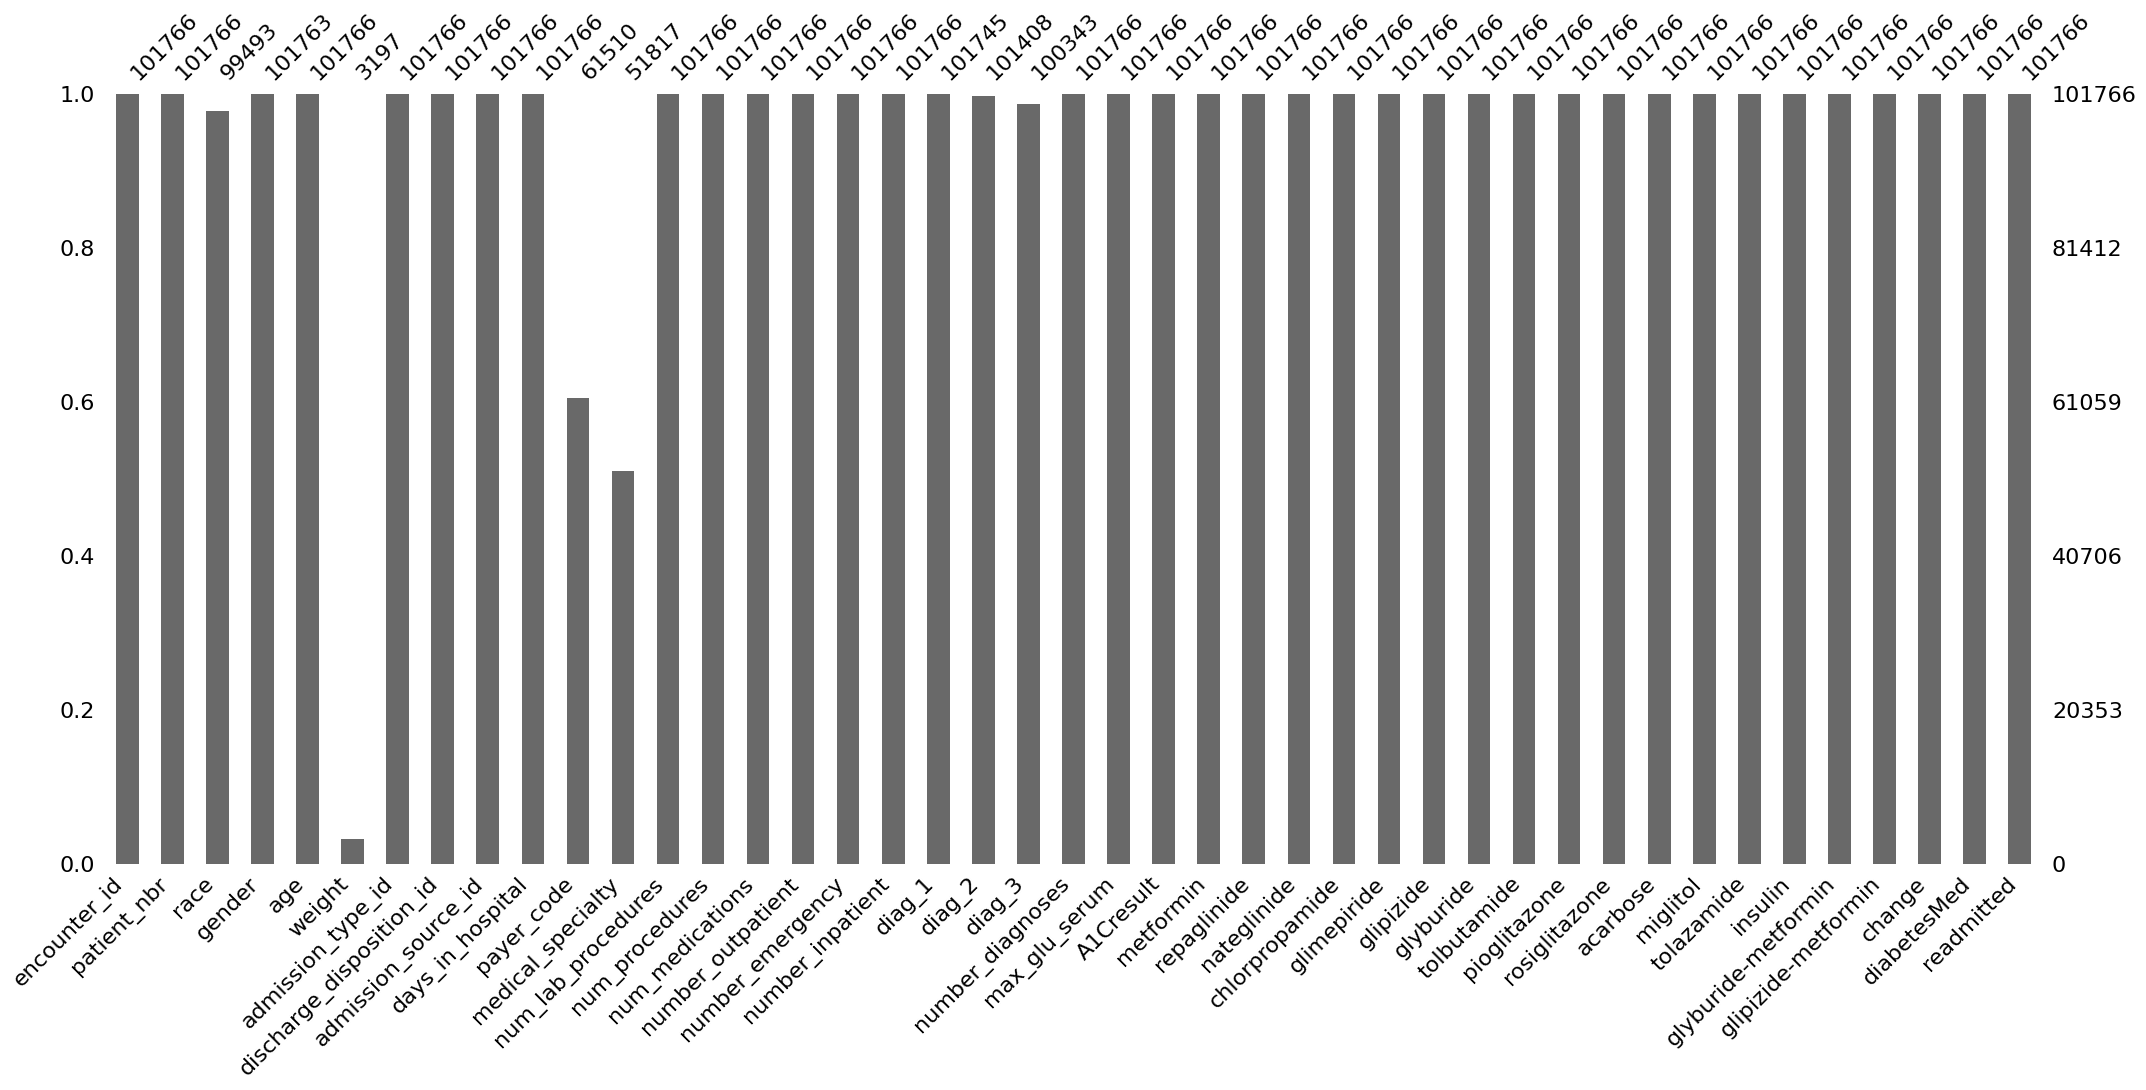

In [14]:
# graphic bar of features with total of Complete Values
msno.bar(df)

In [15]:
# weight, medical_speciality, race and payer_code have missing value. diag_1 , 2 , 3 too!

# Show % de missing values of the dataframe for each feature
round(df.isnull().sum()/len(df) * 100, 2) 

encounter_id                 0.00
patient_nbr                  0.00
race                         2.23
gender                       0.00
age                          0.00
weight                      96.86
admission_type_id            0.00
discharge_disposition_id     0.00
admission_source_id          0.00
days_in_hospital             0.00
payer_code                  39.56
medical_specialty           49.08
num_lab_procedures           0.00
num_procedures               0.00
num_medications              0.00
number_outpatient            0.00
number_emergency             0.00
number_inpatient             0.00
diag_1                       0.02
diag_2                       0.35
diag_3                       1.40
number_diagnoses             0.00
max_glu_serum                0.00
A1Cresult                    0.00
metformin                    0.00
repaglinide                  0.00
nateglinide                  0.00
chlorpropamide               0.00
glimepiride                  0.00
glipizide     

In [16]:
# Droping columns that have high % of Missing Values
df = df.drop(columns =['weight','payer_code', 'medical_specialty'])
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,days_in_hospital,num_lab_procedures,...,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,No,Up,No,No,Ch,Yes,YES
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,No,Up,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,No,Steady,No,No,Ch,Yes,NO


## What records/rows can be counted to predict LoS 

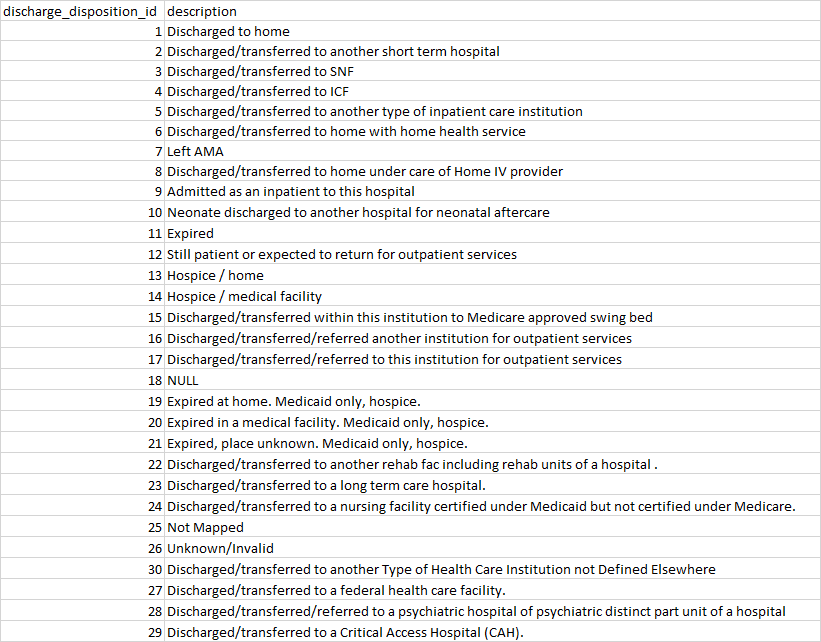

In [17]:
# % da quantidade de rows for each discharge disposition id (11, 19, 20, 21, 13, 14, 7, 2, 3, 4, 5, 10, 15, 16, 17, 22, 23, 24, 27, 28, 29, 30)

print(round(df['discharge_disposition_id'].value_counts()/len(df)*100), 2)

1     59.0
3     14.0
6     13.0
18     4.0
2      2.0
22     2.0
11     2.0
5      1.0
25     1.0
4      1.0
7      1.0
23     0.0
13     0.0
14     0.0
28     0.0
8      0.0
15     0.0
24     0.0
9      0.0
17     0.0
16     0.0
19     0.0
10     0.0
27     0.0
12     0.0
20     0.0
Name: discharge_disposition_id, dtype: float64 2


In [18]:
''' 2 ways of doing it:

1.) ACTUALLY DROPING THE ROWS AND LEAVING THE ONES WE WANT TO KEEP 
df.drop(df[(df['Unit_Price'] >400) & (df['Unit_Price'] < 600)].index, inplace=True)

2) JUST SELECTING THE ONE WE WANT TO ERASE
df = df[df.rebounds != 7]

'''

" 2 ways of doing it:\n\n1.) ACTUALLY DROPING THE ROWS AND LEAVING THE ONES WE WANT TO KEEP \ndf.drop(df[(df['Unit_Price'] >400) & (df['Unit_Price'] < 600)].index, inplace=True)\n\n2) JUST SELECTING THE ONE WE WANT TO ERASE\ndf = df[df.rebounds != 7]\n\n"

In [19]:
# Droping rows of 'discharge_disposition_id' feature based on literature

# 1 OPTION (exclude dead patients + AMA + discharged for other facilities)
values1 = [11, 19, 20, 21, 13, 14, 7, 2, 3, 4, 5, 10, 15, 16, 17, 22, 23, 24, 27, 28, 29, 30]
df1 = df[df.discharge_disposition_id.isin(values1) == False]


# 2 OPTION (exclude dead patients anywhere)
values2 = [11, 19, 20, 21, 13, 14]
df2 = df[df.discharge_disposition_id.isin(values2) == False]


print("Option 1 final size of the df: ", len(df1)," and % do total:", 100* round(len(df1)/ len(df), 2), "%" )
print("Option 2 final size of the df: ", len(df2)," and % do total:",  100* round(len(df2)/ len(df), 2), "%" )

len(df)

Option 1 final size of the df:  77948  and % do total: 77.0 %
Option 2 final size of the df:  99343  and % do total: 98.0 %


101766

In [20]:
df = df2
print(len(df))
print(len(df2))

99343
99343


# FEATURE ENGINEERING (building additional features out of existing data)

The relationship between the features can be utilized to create a new feature that can potentially act as a significant predictor while building a predictive model. 

Using this dataset, the variables **‘number inpatient’**, **‘number outpatient’**, **‘number emergency’** which gives the count of the inpatient, outpatient and emergency visits of the patient after the first encounter of diabetes is combined to engineer a new variable by summing the number of all the types of patient visits and named as **‘service utilization’** which denotes the total number of visits of the patients telling the how well the services are utilized by the patient. 

Similarly, **23 different features** are giving the information whether there was medication change for that patient, the sum of which gives a new feature **‘medication change count’** denoting the number of times the medication was changed for that patient. 


New variables to be created:
* **Service_utilization** (measures the patient's usage of hospital services)= summation of attributes **"number_impatient"**, **"number emergency"** and **"number impatient"**
* **number_of_medications**  = count of medications the patient takes
* **number_of medications_changed** =  count how many times the medications dosage was increased or decreased

The code bits below are creating new variables by combining existing variables through arithmetic operations and as it can be very time consuming to see which features are most predictive, I used the ones mentioned on the literature about this dataset and LoS prediction

In [21]:
# Creating service_utilization feature 
df['total_visits'] = df['number_inpatient'] + df['number_emergency'] + df['number_outpatient']
df['total_days_in_hospital'] = df['days_in_hospital'] * df['total_visits']

df['service_utilization'] = df['total_visits'] + df['total_days_in_hospital']



# Creating number_of_medications feature
df['number_of_medications'] = df[['metformin',	'repaglinide',	'nateglinide', 	'chlorpropamide', 'glimepiride', 	'glipizide', 'glyburide', 'tolbutamide',	
                                  'pioglitazone',	'rosiglitazone', 'acarbose', 'miglitol',	'tolazamide',	'insulin',	'glyburide-metformin',	'glipizide-metformin']].apply(lambda x: x[x!='No'].count(), axis=1)



# Creating number_of_medication_changes feature
df['number_of_medication_changes'] = df[['metformin',	'repaglinide',	'nateglinide', 	'chlorpropamide', 'glimepiride', 	'glipizide', 'glyburide', 'tolbutamide',	
                                         'pioglitazone',	'rosiglitazone', 'acarbose', 'miglitol',	'tolazamide',	'insulin',	'glyburide-metformin',	'glipizide-metformin']].apply(lambda x: sum(x[i]!=x[i+1] for i in range(len(x)-1)), axis=1)


In [22]:
engineered_features = ['service_utilization','number_of_medications' 'number_of_medication_changes' ]

In [23]:
df = df.drop('total_visits', axis = 1)
df = df.drop('total_days_in_hospital', axis = 1)
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,days_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted,service_utilization,number_of_medications,number_of_medication_changes
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,NO,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,Ch,Yes,YES,0,1,2
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,Yes,NO,9,1,2
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,Ch,Yes,NO,0,1,2
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,Ch,Yes,NO,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,Ch,Yes,YES,0,2,3
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,Yes,NO,6,1,2
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,Ch,Yes,NO,2,2,3
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,Ch,Yes,NO,11,3,6


# SKEWED TARGET VARIABLE


In [27]:
# https://www.kaggle.com/code/aleksandradeis/regression-addressing-extreme-rare-cases
# https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

1.141820370463522


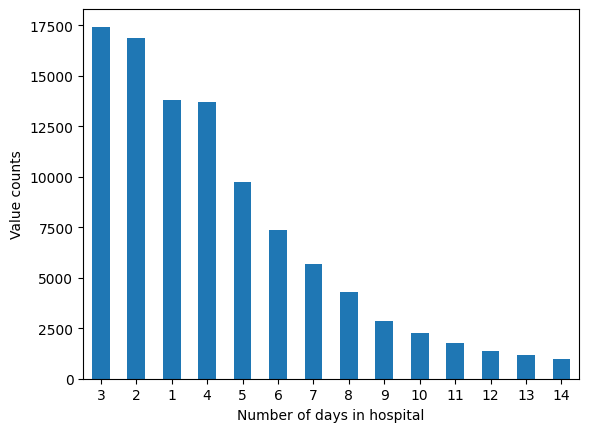

In [28]:
print(df['days_in_hospital'].skew())

# Assuming df is your DataFrame containing the 'days_in_hospital' column
df['days_in_hospital'].value_counts().plot(kind='bar')

# Set the axis labels
plt.xlabel('Number of days in hospital')
plt.ylabel('Value counts')
plt.xticks(rotation=0)

# Display the plot
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '1.7'),
  Text(1, 0, '1.4'),
  Text(2, 0, '1.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '2.2'),
  Text(5, 0, '2.4'),
  Text(6, 0, '2.6'),
  Text(7, 0, '2.8'),
  Text(8, 0, '3.0'),
  Text(9, 0, '3.2'),
  Text(10, 0, '3.3'),
  Text(11, 0, '3.5'),
  Text(12, 0, '3.6'),
  Text(13, 0, '3.7')])

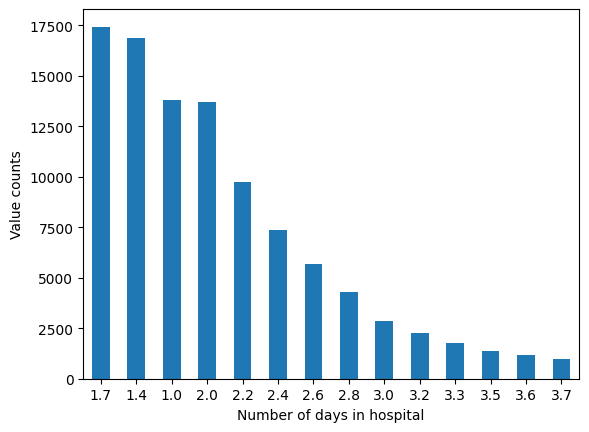

In [29]:
# Square Root Transform !!!
days_sqrt = np.sqrt(df['days_in_hospital'])
#print(days_sqrt.skew())

round(days_sqrt,1).value_counts().plot(kind = 'bar')
plt.xlabel('Number of days in hospital')
plt.ylabel('Value counts')
plt.xticks(rotation=0)

In [30]:
# Log Transform
days_log = np.log(df['days_in_hospital'])
days_log.skew()
#days_log.value_counts().plot(kind = 'bar')

# Box-Cox Transform
from scipy import stats
days_box = stats.boxcox(df['days_in_hospital'])[0]
pd.Series(days_box).skew()
#pd.Series(days_box).value_counts().plot(kind = 'bar')

-0.023076739380161825

In [31]:
# Calculate skewness of target variable
target_skew = y_train.skew()
target_skew


# Apply Square Root Transform to target variable
y_train = np.sqrt(y_train)
y_val = np.sqrt(y_val)
y_test = np.sqrt(y_test)

# TRAIN : VALIDATION : TEST SPLIT 

* https://www.malicksarr.com/split-train-test-validation-python/?

* https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c

* https://realpython.com/train-test-split-python-data/

* stk overflow basic

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# 'X' is the whole dataset and 'y' is the target one:
X = df.drop('days_in_hospital', axis = 1)
y = df['days_in_hospital']

# Split the dataset into train, validation and test sets
train, test = train_test_split(df, test_size=0.1, random_state=42)
train, val = train_test_split(train, test_size=0.111, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # test_size = 10% and train_size = 90%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.111, random_state=42) #  second test_size = test_size / 1- test_size  --> 0.1 / 1-0.1 = 0.111

print(X_train.shape), print(y_train.shape)
print()
print(X_val.shape), print(y_val.shape)
print()
print(X_test.shape), print(y_test.shape)
print()

print("train: ",round((len(train)/len(df))*100,2), '\n',"val: ", round((len(val)/len(df))*100,2), '\n',"test: ", round((len(test)/len(df))*100,2))
print("train: ",len(train), '\n',"val: ", len(val), '\n',"test: ", len(test))


(79483, 42)
(79483,)

(9925, 42)
(9925,)

(9935, 42)
(9935,)

train:  80.01 
 val:  9.99 
 test:  10.0


In [26]:
'''
# Define target feature
target_feature = 'days_in_hospital'

# Split the dataset into train, validation and test sets
train, test = train_test_split(df, test_size=0.1, random_state=42)
train, val = train_test_split(train, test_size=0.111, random_state=42)

# Split the features and target variables
X_train, y_train = train.drop(target_feature, axis=1), train[target_feature]
X_val, y_val = val.drop(target_feature, axis=1), val[target_feature]
X_test, y_test = test.drop(target_feature, axis=1), test[target_feature]

# Save the splits into separate CSV files
#train.to_csv('train.csv', index=False) // #val.to_csv('validation.csv', index=False) // #test.to_csv('test.csv', index=False)

print(X_train.shape), print(y_train.shape)
print()
print(X_val.shape), print(y_val.shape)
print()
print(X_test.shape), print(y_test.shape)
print()
print("train: ",round((len(train)/len(df))*100,2), '\n',"val: ", round((len(val)/len(df))*100,2), '\n',"test: ", round((len(test)/len(df))*100,2))
'''

'\n# Define target feature\ntarget_feature = \'days_in_hospital\'\n\n# Split the dataset into train, validation and test sets\ntrain, test = train_test_split(df, test_size=0.1, random_state=42)\ntrain, val = train_test_split(train, test_size=0.111, random_state=42)\n\n# Split the features and target variables\nX_train, y_train = train.drop(target_feature, axis=1), train[target_feature]\nX_val, y_val = val.drop(target_feature, axis=1), val[target_feature]\nX_test, y_test = test.drop(target_feature, axis=1), test[target_feature]\n\n# Save the splits into separate CSV files\n#train.to_csv(\'train.csv\', index=False) // #val.to_csv(\'validation.csv\', index=False) // #test.to_csv(\'test.csv\', index=False)\n\nprint(X_train.shape), print(y_train.shape)\nprint()\nprint(X_val.shape), print(y_val.shape)\nprint()\nprint(X_test.shape), print(y_test.shape)\nprint()\nprint("train: ",round((len(train)/len(df))*100,2), \'\n\',"val: ", round((len(val)/len(df))*100,2), \'\n\',"test: ", round((len(test

# FEATURE ENCODING (converts categorical/ nominal variables to numerical variables) FEATURE SCALING (data standardization / normalization)



***Feature encoding***

* Race: One-hot encoding
* Gender: Binary encoding (0 or 1)
* Age group: Integer encoding
* **Admission type: One-hot encoding**
* **Discharge disposition: One-hot encoding**
* **Admission source: One-hot encoding** 
* Time in hospital: Numerical feature (no encoding needed)
* Number of lab procedures: Numerical feature (no encoding needed)
* Number of procedures: Numerical feature (no encoding needed)
* Number of medications: Numerical feature (no encoding needed)
* diag_1, 2 and 3 ???
* Number of diagnoses: Numerical feature (no encoding needed)
* Max glucose serum test result: One-hot encoding
* A1C test result: One-hot encoding
* 24 features indicating the presence or absence of different diagnoses: Binary encoding (0 or 1)
* Change of medications: Binary encoding (0 or 1)
* Diabetes medications: Binary encoding (0 or 1)
* Readmitted: Binary encoding (0 or 1)

The 23 features having the information on the medication change have values such as ‘No’ and ‘Ch’ which are coded as ‘0’ and ‘1’ denoting that there is no change and change in medication respectively

Variables ‘A1c laboratory test’, ‘Glucose serum test’, ‘Discharge disposition’ etc. are also encoded

**Feature standardization**

* Done using the z-score normalization method such that after standardization all the variables have a similar influence on the model.

* Data was standardized to conform to a Gaussian distribution with μ=0 and σ=1. Rescaling was performed using z-score

In [32]:
# 'encounter_id', 'patient_nbr', 'diag_1', 'diag_2', 'diag_3'????
# X_train.drop(['gender'] ,axis=1, inplace=True) !!!! 

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Define preprocessing pipeline
numeric_features = ['num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 
                    'service_utilization', 'number_of_medication_changes', 'number_of_medications']

                    
categorical_features = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                        'glimepiride', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
                        'change', 'diabetesMed', 'readmitted']

 
# Apply label encoding on age feature
age_label_encoder = LabelEncoder()
X_train['age'] = age_label_encoder.fit_transform(X_train['age'])
X_val['age'] = age_label_encoder.transform(X_val['age'])
X_test['age'] = age_label_encoder.transform(X_test['age'])

# Define ColumnTransformer for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Fit and transform the preprocessing pipeline on the training set
X_train_processed = preprocessor.fit_transform(X_train)

# Apply the same transformations on the validation and test sets
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)


In [34]:
# Convert the processed training set to a dataframe
X_train_processed = pd.DataFrame(X_train_processed.toarray(), columns=preprocessor.get_feature_names_out())

# Convert the processed validation set to a dataframe
X_val_processed = pd.DataFrame(X_val_processed.toarray(), columns=preprocessor.get_feature_names_out())

# Convert the processed test set to a dataframe
X_test_processed = pd.DataFrame(X_test_processed.toarray(), columns=preprocessor.get_feature_names_out())


In [35]:
print(X_train_processed.shape)
print(X_train.shape)

print()

print(X_val_processed.shape)
print(X_val.shape)
print()

print(X_test_processed.shape)
print(X_test.shape)


(79483, 138)
(79483, 42)

(9925, 138)
(9925, 42)

(9935, 138)
(9935, 42)


# SVM / SVR

SVM, which stands for Support Vector Machine, is a classifier. Classifiers perform classification, predicting discrete categorical labels. SVR, which stands for Support Vector Regressor, is a regressor. Regressors perform regression, predicting continuous ordered variables. Both use very similar algorithms, but predict different types of variables.

In [36]:
'''selected_features = ['num__num_lab_procedures', 'num__num_procedures',
       'num__num_medications', 'num__number_outpatient',
       'num__number_emergency', 'num__number_inpatient',
       'num__number_diagnoses', 'num__service_utilization',
       'num__number_of_medication_changes', 'num__number_of_medications',
       'cat__race_Caucasian', 'cat__gender_Male', 'cat__admission_type_id_3',
       'cat__discharge_disposition_id_1', 'cat__admission_source_id_1',
       'cat__admission_source_id_7', 'cat__A1Cresult_None', 'cat__insulin_No',
       'cat__insulin_Steady', 'cat__readmitted_NO']

X_train_processed = X_train_processed[selected_features]
X_val_processed = X_val_processed[selected_features]
X_test_processed = X_test_processed[selected_features]       '''

"selected_features = ['num__num_lab_procedures', 'num__num_procedures',\n       'num__num_medications', 'num__number_outpatient',\n       'num__number_emergency', 'num__number_inpatient',\n       'num__number_diagnoses', 'num__service_utilization',\n       'num__number_of_medication_changes', 'num__number_of_medications',\n       'cat__race_Caucasian', 'cat__gender_Male', 'cat__admission_type_id_3',\n       'cat__discharge_disposition_id_1', 'cat__admission_source_id_1',\n       'cat__admission_source_id_7', 'cat__A1Cresult_None', 'cat__insulin_No',\n       'cat__insulin_Steady', 'cat__readmitted_NO']\n\nX_train_processed = X_train_processed[selected_features]\nX_val_processed = X_val_processed[selected_features]\nX_test_processed = X_test_processed[selected_features]       "

## Optuma Linear

In [37]:
!pip install optuna
import optuna
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
# LinearSVR-->  Define the objective function to minimize (in this case, the validation MAE) 
def objective(trial):
    C = trial.suggest_float('C', 1, 100)
    max_iter = trial.suggest_int('max_iter', 1000, 10000)
    model = LinearSVR(C=C, max_iter=max_iter)
    model.fit(X_train_processed, y_train)
    val_predictions = model.predict(X_val_processed)
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_rmse = mean_squared_error(y_val, val_predictions, squared=False)
    val_mre = abs((y_val - val_predictions) / y_val).mean()
    val_r2_score = r2_score(y_val, val_predictions)
    return val_mae

# Define the Optuna study and run the optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters and the corresponding validation score
print("Best hyperparameters: ", study.best_params)
print("Validation MAE: ", study.best_value)


[I 2023-05-19 09:51:33,663] A new study created in memory with name: no-name-9b930313-88b6-4609-8218-daeba1125f05
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[I 2023-05-19 09:56:10,972] Trial 0 finished with value: 0.4101748471885224 and parameters: {'C': 66.74858386374329, 'max_iter': 8495}. Best is trial 0 with value: 0.4101748471885224.
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[I 2023-05-19 09:57:38,601] Trial 1 finished with value: 0.3816116925674642 and parameters: {'C': 2.0960450243537254, 'max_iter': 4976}. Best is trial 1 with value: 0.3816116925674642.
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[I 2023-05

Best hyperparameters:  {'C': 12.6810048388066, 'max_iter': 7575}
Validation MAE:  0.3814567843710498


In [39]:
# LinearSVR-->
# Train a LinearSVR with the best hyperparameters found
best_params = study.best_params
model = LinearSVR(C=best_params['C'], max_iter=best_params['max_iter'])
model.fit(X_train_processed, y_train)

# Evaluate the LinearSVR model on the train set
train_predictions = model.predict(X_train_processed)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mre = mean_absolute_error(y_train, train_predictions) / np.mean(y_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

# Evaluate the LinearSVR model on the validation set
val_predictions = model.predict(X_val_processed)
val_mae = mean_absolute_error(y_val, val_predictions)
val_mre = mean_absolute_error(y_val, val_predictions) / np.mean(y_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)


# Evaluate the LinearSVR model on the test set
test_predictions = model.predict(X_test_processed)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mre = mean_absolute_error(y_test, test_predictions) / np.mean(y_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)


# Print the training metrics
print(" LINEAR hyper set best train")
print("train MAE:", train_mae)
print("train RMSE:", train_mse)
print("train MRE:", train_mre)
print("train R2:", train_r2)
print("train MSE:", train_rmse)

print()
# Print the evaluation metrics
print(" LINEAR hyper set best eval")
print("VAL MAE:", val_mae)
print("VAL RMSE:", val_rmse)
print("VAL MRE:", val_mre)
print("VAL R2:", val_r2)
print("VAL MSE:", val_mse)

print()
# Print the test metrics
print("LINEAR hyper set best test")
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test MRE:", test_mre)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)

 LINEAR hyper set best train
train MAE: 0.3852644232123983
train RMSE: 0.26523679062278777
train MRE: 0.1947675139298356
train R2: 0.4277928542025782
train MSE: 0.515011447079371

 LINEAR hyper set best eval
VAL MAE: 0.38234530451055176
VAL RMSE: 0.5063176889564477
VAL MRE: 0.19347433268979392
VAL R2: 0.4451882849964772
VAL MSE: 0.2563576021501981

LINEAR hyper set best test
Test MAE: 0.3921284542880511
Test RMSE: 0.5271879047538757
Test MRE: 0.19746280299554686
Test R2: 0.41099832659116564
Test MSE: 0.27792708691878143


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Optuma SVR

In [40]:
# SVR-->
# Define the objective function to minimize (in this case, the validation MAE)

def objective(trial):
    C = trial.suggest_float("C", 1.5, 100)
    max_iter = trial.suggest_int('max_iter', 1000, 10000)
    kernel= trial.suggest_categorical('kernel', ['linear', 'poly'])
    model2 = SVR(C=C, max_iter=max_iter, kernel = kernel)
    model2.fit(X_train_processed, y_train)
    val_predictions = model2.predict(X_val_processed)
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_rmse = mean_squared_error(y_val, val_predictions, squared=False)
    val_mre = abs((y_val - val_predictions) / y_val).mean()
    val_r2_score = r2_score(y_val, val_predictions)
    return val_mae

# Define the Optuna study and run the optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters and the corresponding validation score
print("Best hyperparameters: ", study.best_params)
print("Validation MAE: ", study.best_value)


[I 2023-05-19 10:55:32,037] A new study created in memory with name: no-name-69388ce7-01d3-4db8-95d2-ad92dbcdd65a
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=8694).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2023-05-19 10:58:14,048] Trial 0 finished with value: 0.9523500453197355 and parameters: {'C': 30.20093896721076, 'max_iter': 8694, 'kernel': 'poly'}. Best is trial 0 with value: 0.9523500453197355.
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2228).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
[I 2023-05-19 10:58:59,866] Trial 1 finished with value: 1.5922727257882734 and parameters: {'C': 8.747851796411904, 'max_iter': 2228, 'kernel': 'poly'}. Best is trial 0 with value: 0.9523500453197355.
/usr/local/lib/python3.10/dist-packages/sklearn/sv

Best hyperparameters:  {'C': 2.1943152285822505, 'max_iter': 7770, 'kernel': 'poly'}
Validation MAE:  0.6754306096581334


In [41]:
# LinearSVR-->
# Train a LinearSVR with the best hyperparameters found
best_params = study.best_params
model2 = LinearSVR(C=best_params['C'], max_iter=best_params['max_iter'])
model2.fit(X_train_processed, y_train)

# Evaluate the LinearSVR model on the train set
train_predictions = model2.predict(X_train_processed)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mre = mean_absolute_error(y_train, train_predictions) / np.mean(y_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

# Evaluate the LinearSVR model on the validation set
val_predictions = model2.predict(X_val_processed)
val_mae = mean_absolute_error(y_val, val_predictions)
val_mre = mean_absolute_error(y_val, val_predictions) / np.mean(y_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)


# Evaluate the LinearSVR model on the test set
test_predictions = model2.predict(X_test_processed)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mre = mean_absolute_error(y_test, test_predictions) / np.mean(y_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)


# Print the training metrics
print("SVR hyper set best train")
print("train MAE:", train_mae)
print("train RMSE:", train_mse)
print("train MRE:", train_mre)
print("train R2:", train_r2)
print("train MSE:", train_rmse)

print()
# Print the evaluation metrics
print(" SVR hyper set best eval")
print("VAL MAE:", val_mae)
print("VAL RMSE:", val_rmse)
print("VAL MRE:", val_mre)
print("VAL R2:", val_r2)
print("VAL MSE:", val_mse)

print()
# Print the test metrics
print(" SVR hyper set best test")
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test MRE:", test_mre)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)

SVR hyper set best train
train MAE: 0.3844542896229344
train RMSE: 0.2653587948996266
train MRE: 0.1943579570238143
train R2: 0.4275296489403628
train MSE: 0.5151298815829136

 SVR hyper set best eval
VAL MAE: 0.38155491164828076
VAL RMSE: 0.506189468028785
VAL MRE: 0.19307437817279935
VAL R2: 0.44546925272366156
VAL MSE: 0.2562277775432643

 SVR hyper set best test
Test MAE: 0.3915211414394123
Test RMSE: 0.5273001316862197
Test MRE: 0.19715698051294953
Test R2: 0.4107475283987748
Test MSE: 0.2780454288763047


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Linear SVR 1


In [42]:
# Define the LinearSVR model
linear_svr = LinearSVR()

# Fit the LinearSVR model on the training set without hyperparameters
linear_svr.fit(X_train_processed, y_train)

# Evaluate the LinearSVR model on the train set
train_predictions = linear_svr.predict(X_train_processed)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mre = mean_absolute_error(y_train, train_predictions) / np.mean(y_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

# Evaluate the LinearSVR model on the validation set
val_predictions = linear_svr.predict(X_val_processed)
val_mae = mean_absolute_error(y_val, val_predictions)
val_mre = mean_absolute_error(y_val, val_predictions) / np.mean(y_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)


# Evaluate the LinearSVR model on the test set
test_predictions = linear_svr.predict(X_test_processed)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mre = mean_absolute_error(y_test, test_predictions) / np.mean(y_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)


# Print the training metrics
print("nothing train")
print("train MAE:", train_mae)
print("train RMSE:", train_mse)
print("train MRE:", train_mre)
print("train R2:", train_r2)
print("train MSE:", train_rmse)

print()
# Print the evaluation metrics
print("nothing  eval")
print("VAL MAE:", val_mae)
print("VAL RMSE:", val_rmse)
print("VAL MRE:", val_mre)
print("VAL R2:", val_r2)
print("VAL MSE:", val_mse)

print()
# Print the test metrics
print("nothing test")
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test MRE:", test_mre)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)

nothing train
train MAE: 0.38480120735818907
train RMSE: 0.264862714186811
train MRE: 0.19453333865980948
train R2: 0.42859986596455035
train MSE: 0.5146481460054151

nothing  eval
VAL MAE: 0.3819494153076505
VAL RMSE: 0.5059174910154245
VAL MRE: 0.1932740048749971
VAL R2: 0.44606499446893155
VAL MSE: 0.25595250771534217

nothing test
Test MAE: 0.3916369704359258
Test RMSE: 0.5269998594502858
Test MRE: 0.1972153081300087
Test R2: 0.41141843958655333
Test MSE: 0.27772885186062096


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Linear SVR 2

In [43]:
# hyperparameter tunning 
linear_2 = LinearSVR(C=1.0, max_iter=10000)

# Fit the LinearSVR on the training set with hyperparameters
linear_2.fit(X_train_processed, y_train)


# Evaluate the LinearSVR model on the train set
train_predictions = linear_2.predict(X_train_processed)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mre = mean_absolute_error(y_train, train_predictions) / np.mean(y_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

# Evaluate the LinearSVR model on the validation set
val_predictions = linear_2.predict(X_val_processed)
val_mae = mean_absolute_error(y_val, val_predictions)
val_mre = mean_absolute_error(y_val, val_predictions) / np.mean(y_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)


# Evaluate the LinearSVR model on the test set
test_predictions = linear_2.predict(X_test_processed)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mre = mean_absolute_error(y_test, test_predictions) / np.mean(y_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)


# Print the training metrics
print("C=1.0, max_iter=10000")
print("train MAE:", train_mae)
print("train RMSE:", train_mse)
print("train MRE:", train_mre)
print("train R2:", train_r2)
print("train MSE:", train_rmse)

print()
# Print the evaluation metrics
print("C=1.0, max_iter=10000")
print("VAL MAE:", val_mae)
print("VAL RMSE:", val_rmse)
print("VAL MRE:", val_mre)
print("VAL R2:", val_r2)
print("VAL MSE:", val_mse)

print()
# Print the test metrics
print("C=1.0, max_iter=10000")
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test MRE:", test_mre)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)

C=1.0, max_iter=10000
train MAE: 0.3844601463334599
train RMSE: 0.26523442127075864
train MRE: 0.19436091783950382
train R2: 0.42779796571127504
train MSE: 0.5150091467835873

C=1.0, max_iter=10000
VAL MAE: 0.381591623714471
VAL RMSE: 0.5060338763186885
VAL MRE: 0.19309295520885555
VAL R2: 0.44581010188135717
VAL MSE: 0.2560702839821177

C=1.0, max_iter=10000
Test MAE: 0.3914973157673831
Test RMSE: 0.5270289995797809
Test MRE: 0.1971449826996547
Test R2: 0.41135334728427775
Test MSE: 0.27775956639806465


## LinearSVR 3

In [44]:
# hyperparameter tunning 
linear_3 = LinearSVR(C=100.0, max_iter=100000)

# Fit the LinearSVR on the training set with hyperparameters
linear_3.fit(X_train_processed, y_train)

# Evaluate the LinearSVR model on the train set
train_predictions = linear_3.predict(X_train_processed)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mre = mean_absolute_error(y_train, train_predictions) / np.mean(y_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

# Evaluate the LinearSVR model on the validation set
val_predictions = linear_3.predict(X_val_processed)
val_mae = mean_absolute_error(y_val, val_predictions)
val_mre = mean_absolute_error(y_val, val_predictions) / np.mean(y_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)


# Evaluate the LinearSVR model on the test set
test_predictions = linear_3.predict(X_test_processed)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mre = mean_absolute_error(y_test, test_predictions) / np.mean(y_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)


# Print the training metrics
print("C=100.0, max_iter=100000")
print("train MAE:", train_mae)
print("train RMSE:", train_mse)
print("train MRE:", train_mre)
print("train R2:", train_r2)
print("train MSE:", train_rmse)

print()
# Print the evaluation metrics
print("C=100.0, max_iter=100000")
print("VAL MAE:", val_mae)
print("VAL RMSE:", val_rmse)
print("VAL MRE:", val_mre)
print("VAL R2:", val_r2)
print("VAL MSE:", val_mse)

print()
# Print the test metrics
print("C=100.0, max_iter=100000")
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test MRE:", test_mre)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)

C=100.0, max_iter=100000
train MAE: 0.38461906251555955
train RMSE: 0.26544966030852934
train MRE: 0.19444125671287474
train R2: 0.42733362094531036
train MSE: 0.515218070634687

C=100.0, max_iter=100000
VAL MAE: 0.3815998580196855
VAL RMSE: 0.5059360108486062
VAL MRE: 0.19309712193115539
VAL R2: 0.44602443856071805
VAL MSE: 0.25597124707340096

C=100.0, max_iter=100000
Test MAE: 0.39151425948579466
Test RMSE: 0.5266149410883652
Test MRE: 0.19715351499078054
Test R2: 0.41227792031822874
Test MSE: 0.2773232961775023


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Normal SVR 1

In [45]:
# hyperparameter tunning 
from sklearn.svm import SVR
svr_1 = SVR(C=1.5, epsilon= 0.1, max_iter=100000, gamma= 1e-07, kernel = 'linear')

# Fit the LinearSVR on the training set with hyperparameters
svr_1.fit(X_train_processed, y_train)

# Evaluate the LinearSVR model on the train set
train_predictions = svr_1.predict(X_train_processed)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mre = mean_absolute_error(y_train, train_predictions) / np.mean(y_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

# Evaluate the LinearSVR model on the validation set
val_predictions = svr_1.predict(X_val_processed)
val_mae = mean_absolute_error(y_val, val_predictions)
val_mre = mean_absolute_error(y_val, val_predictions) / np.mean(y_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)


# Evaluate the LinearSVR model on the test set
test_predictions = svr_1.predict(X_test_processed)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mre = mean_absolute_error(y_test, test_predictions) / np.mean(y_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)


# Print the training metrics
print("C=1.5, epsilon= 0.1, max_iter=100000, gamma= 1e-07, kernel = 'linear'")
print("train MAE:", train_mae)
print("train RMSE:", train_mse)
print("train MRE:", train_mre)
print("train R2:", train_r2)
print("train MSE:", train_rmse)

print()
# Print the evaluation metrics
print("C=1.5, epsilon= 0.1, max_iter=100000, gamma= 1e-07, kernel = 'linear'")
print("VAL MAE:", val_mae)
print("VAL RMSE:", val_rmse)
print("VAL MRE:", val_mre)
print("VAL R2:", val_r2)
print("VAL MSE:", val_mse)

print()
# Print the test metrics
print("C=1.5, epsilon= 0.1, max_iter=100000, gamma= 1e-07, kernel = 'linear'")
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test MRE:", test_mre)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C=1.5, epsilon= 0.1, max_iter=100000, gamma= 1e-07, kernel = 'linear'
train MAE: 0.5653598617702695
train RMSE: 0.5448979075707675
train MRE: 0.2858134001436323
train R2: -0.1755325334390787
train MSE: 0.7381720040551304

C=1.5, epsilon= 0.1, max_iter=100000, gamma= 1e-07, kernel = 'linear'
VAL MAE: 0.5608896184341106
VAL RMSE: 0.7318517460660878
VAL MRE: 0.28382130853702653
VAL R2: -0.15916603861810952
VAL MSE: 0.5356069782199815

C=1.5, epsilon= 0.1, max_iter=100000, gamma= 1e-07, kernel = 'linear'
Test MAE: 0.5786398211258685
Test RMSE: 0.7503429998053945
Test MRE: 0.29138370285269444
Test R2: -0.19317823769293585
Test MSE: 0.5630146173569583


## Normal SVR 3

In [46]:
# hyperparameter tunning 
svr3 = SVR()

# Fit the LinearSVR on the training set with hyperparameters
svr3.fit(X_train_processed, y_train)

# Evaluate the LinearSVR model on the train set
train_predictions = svr3.predict(X_train_processed)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mre = mean_absolute_error(y_train, train_predictions) / np.mean(y_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

# Evaluate the LinearSVR model on the validation set
val_predictions = svr3.predict(X_val_processed)
val_mae = mean_absolute_error(y_val, val_predictions)
val_mre = mean_absolute_error(y_val, val_predictions) / np.mean(y_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)


# Evaluate the LinearSVR model on the test set
test_predictions = svr3.predict(X_test_processed)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mre = mean_absolute_error(y_test, test_predictions) / np.mean(y_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)


# Print the training metrics
print("nothing SVR")
print("train MAE:", train_mae)
print("train RMSE:", train_mse)
print("train MRE:", train_mre)
print("train R2:", train_r2)
print("train MSE:", train_rmse)

print()
# Print the evaluation metrics
print("nothing SVR")
print("VAL MAE:", val_mae)
print("VAL RMSE:", val_rmse)
print("VAL MRE:", val_mre)
print("VAL R2:", val_r2)
print("VAL MSE:", val_mse)

print()
# Print the test metrics
print("nothing SVR")
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test MRE:", test_mre)
print("Test R2:", test_r2)
print("Test MSE:", test_mse)

nothing SVR
train MAE: 0.25526715257478744
train RMSE: 0.144657889719479
train MRE: 0.12904837742448313
train R2: 0.6879230894058717
train MSE: 0.38033917720828997

nothing SVR
VAL MAE: 0.263444306934529
VAL RMSE: 0.38824187688338907
VAL MRE: 0.13330806180640992
VAL R2: 0.6737848116197265
VAL MSE: 0.15073175496593663

nothing SVR
Test MAE: 0.2698819583531412
Test RMSE: 0.3948581982114169
Test MRE: 0.13590354740029026
Test R2: 0.669578748233921
Test MSE: 0.15591299669476658
